# Problem Set 3

### by Desmond Roussel Ngueguin

In [1]:
%reset -f

In [2]:
import numpy as np
import numpy.linalg as npalg
import pandas as pd

import scipy as sp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.io import loadmat
from scipy.sparse.linalg import eigsh

import timeit
import itertools

import matplotlib.tri as tri
import matplotlib.pyplot as plt

from IPython.display import Image

In [3]:
plt.style.use("seaborn")

## Part 1 - Coercivity Lower Bound and X-Norm Error Bound

### Q1.

#### (a) Let's derive an explicit expression for $\alpha_{LB}(\mu)$ for Case I and Case II.

According to the the min-$\theta$ appoach, we can write (with $\bar{\mu} = \left\{1,1,1,1,1,0.1\right\}$)

\begin{align*}
\alpha_{LB}(\mu) &= \alpha(\bar{\mu}) \min_{q=1,\ldots,6}{\frac{\theta^q(\mu)}{\theta^q(\bar{\mu})}} \\
&= \alpha(\bar{\mu}) \min_{}{ \left\{ \frac{\mu_1}{\bar{\mu_1}}, \, \frac{\mu_2}{\bar{\mu_2}} , \, \frac{\mu_3}{\bar{\mu_3}} , \, \frac{\mu_4}{\bar{\mu_4}} , \, \frac{1}{1} , \, \frac{\text{Bi}}{\bar{\text{Bi}}} \right\} }  \\
&= \alpha(\bar{\mu}) \min{}{\left\{k_1, \, k_2, \, k_3, \, k_4, \, 1, \, 10\text{Bi} \right\}}   \\
&= \alpha(\bar{\mu}) \min{}{\left\{k, \, 1, \, 10\text{Bi} \right\}} 
\end{align*}

Let's derive an expression for $\alpha(\bar{\mu})$. According to the X-norm definition, we know that
\begin{align*}
\alpha(\bar{\mu}) &= \inf_{v \in X^e\setminus \{0\}}{\frac{a(v, v; \bar{\mu})}{\Vert v \Vert_X^2}} \\
&= \inf_{v \in X^e\setminus \{0\}}{\frac{\Vert v \Vert_X^2}{\Vert v \Vert_X^2}} \\
&= 1 
\end{align*}

Using it in our min-$\theta$ formula so far, we get:
\begin{align*}
\alpha_{LB}(\mu) &= \min{}{\left\{k, \, 1, \, 10\text{Bi} \right\}} 
\end{align*}

- Case I: $\alpha_{LB}(\mu) = \min{\left\{ k,1 \right\}}$ since $\text{Bi} = 0.1$
- Case II: $\alpha_{LB}(\mu) = \min{}{\left\{k, \, 1, \, 10\text{Bi} \right\}}$

#### (b) Largest effectivity for the energy norm error bound and the output error bound we should anticipate

First, let's compute $\gamma_{UB}$ using the max-$\theta$ approach, 
\begin{align*}
\alpha_{LB}(\mu) &= \gamma(\bar{\mu}) \max_{q=1,\ldots,6}{\frac{\theta^q(\mu)}{\theta^q(\bar{\mu})}} \\
&= \gamma(\bar{\mu}) \max{}{\left\{k, \, 1, \, 10\text{Bi} \right\}} 
\end{align*}

Again by definition of the X-norm just as we did above, $\gamma(\bar{\mu}) = 1$. Then,

- Case I: $\gamma_{UB}(\mu) = \max{\left\{ k,1 \right\}}$ since $\text{Bi} = 0.1$
- Case II: $\gamma_{UB}(\mu) = \max{}{\left\{k, \, 1, \, 10\text{Bi} \right\}}$

According to the lecture notes, the effectivity (in terms of the energy norm) is bounded.
$$
1 \leq \eta_N^{en}(\mu) \leq \sqrt{\frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}}
$$

- Case I: 
$$
\eta_N^{en}(\mu) \leq \sqrt{\frac{\max{\left\{ k,1 \right\}}}{\min{\left\{ k,1 \right\}}}} = 
\left. 
\begin{array}{l}
\sqrt{k} \quad \text{if} \quad k\geq 1 \\
\sqrt{\frac{1}{k}} \quad \text{if} \quad k\leq 1
\end{array}
\right\}
\leq \sqrt{10} \approx 3.162 \quad \text{since  } k \in [0.1,10]
$$

- Case II: 
$$
\eta_N^{en}(\mu) \leq \sqrt{\frac{\max{\left\{ k,1, 10\text{Bi} \right\}}}{\min{\left\{ k,1,10\text{Bi} \right\}}}} = 
\left. 
\begin{array}{l}
\sqrt{\frac{k}{10\text{Bi}}} \quad &\text{if} \quad k\geq 1 \geq 10\text{Bi} \\
&\vdots \\
\sqrt{k} \quad &\text{if} \quad k \geq 10 \text{Bi} \geq 1  \\
&\vdots \\
\sqrt{\frac{10\text{Bi}}{k}} \quad &\text{if} \quad 10\text{Bi} \geq 1 \geq k
\end{array}
\right\}
\leq \sqrt{100} = 10 \quad \text{since  } k \in [0.1,10] \text{ and } \text{Bi} \in [0.01,1]
$$

The largest effectivity for the energy norm error bound we should anticipate for Case I and Case II are respectively $\sqrt{10}$ and $10$. 

As for the output error bound, we have
$$
1 \leq \eta_N^{s}(\mu) \leq \frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}
$$

The largest effectivity for the output error bound we should anticipate for Case I and Case II are respectively $10$ and $100$.



### Q2.

#### Let's prove the bounding properties of the X-norm error bound.
$$
1 \leq \eta_N(\mu) \leq \frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}   \quad \forall \mu \in \mathcal{D}
$$

*In what follows, the norm indicated by $\Vert \cdot \Vert$ is the X-norm i.e $\Vert \cdot \Vert = \Vert \cdot \Vert_X = \sqrt{(\cdot, \cdot)_X} = \sqrt{a(\cdot, \cdot, \bar{\mu})}$*.

The formula for the effectivity is 
$$
\eta_N(\mu) = \frac{\Delta_N(\mu)}{\Vert e(\mu) \Vert} = \frac{\Delta_N(\mu)}{\Vert u(\mu) - u_N(\mu) \Vert}
$$

First, let's compute an expression for the error bound $\Delta_N(\mu)$. We will then use said expression to derive the target bounding property.

Let the residual be the linear bounded form defined for all $v$ in $X^e$ by $r(v;\mu) = a(e(\mu),v,;\mu)$.

Then there exists a Riesz representation for $r$ denoted by $\hat{e}(\mu)$ such that $r(v;\mu) = (v,\hat{e}(\mu))_X = a(v,\hat{e}(\mu);\bar{\mu})$. 
Moreover, 
$$
\Vert \hat{e}(\mu) \Vert = \Vert r(\cdot; \mu) \Vert_{X'} = \sup_{v\neq0}{\frac{\Vert r(v; \mu) \Vert }{\Vert v \Vert}} \\
$$
i.e 
\begin{align*}
\Vert r(v; \mu) \Vert \leq  \Vert \hat{e}(\mu) \Vert  \Vert v \Vert \quad \forall v \text{ in } X^e
\end{align*}

Using $a$'s coercivity, we can write
$$
\alpha_{LB}(\mu) \Vert e(\mu) \Vert^2 \leq  a(e(\mu),e(\mu);\mu) = r(e(\mu);\mu) \leq \Vert \hat{e}(\mu) \Vert  \Vert e(\mu) \Vert 
$$
thus 
$$
\Vert e(\mu) \Vert \leq \frac{\Vert \hat{e}(\mu) \Vert }{\alpha_{LB}(\mu)}
$$

A good choice for the error bound is then 
$$ \Delta_N(\mu) = \frac{\Vert \hat{e}(\mu) \Vert }{\alpha_{LB}(\mu)} $$

and we immediately have 
$$
\eta_N(\mu) = \frac{\Delta_N(\mu)}{\Vert e(\mu) \Vert} \geq 1
$$

Now using $a$'s continuity, we can write
$$
\Vert \hat{e}(\mu) \Vert^2 =  (\hat{e}(\mu),\hat{e}(\mu))_X = r(\hat{e}(\mu);\mu) = a(e(\mu),\hat{e}(\mu);\mu) \leq \gamma_{UB} \Vert e(\mu) \Vert \Vert \hat{e}(\mu) \Vert
$$
thus 
$$
\Vert \hat{e}(\mu) \Vert \leq \gamma_{UB} \Vert e(\mu) \Vert
$$
We can now compute an upper bound for the effectivity
\begin{align*}
\eta_N(\mu) &= \frac{\Delta_N(\mu)}{\Vert e(\mu) \Vert}  \\
&= \frac{\Vert \hat{e}(\mu) \Vert}{ \alpha_{LB}(\mu) \Vert e(\mu) \Vert }  \\
&\leq  \frac{\gamma_{UB}(\mu) \Vert e(\mu) \Vert}{ \alpha_{LB}(\mu) \Vert e(\mu) \Vert }   \\
&= \frac{\gamma_{UB}(\mu)}{ \alpha_{LB}(\mu)}   \qquad \text{assuming $\Vert e(\mu) \Vert \neq 0$}
\end{align*}

We have proven the property 
$$
1 \leq \eta_N(\mu) \leq \frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}   \quad \forall \mu \in \mathcal{D}
$$


## Let's load utility functions from Problem Set 2

In [4]:
## Utility function
def loadFEMatrix(tuning):
    M = loadmat('FE_matrix.mat',simplify_cells=True)
    Ahq = M['FE_matrix'][tuning]['Ahq']
    Fh = M['FE_matrix'][tuning]['Fh']
    return Ahq, Fh

## Load the specified sample
def loadSample(sample):
    return loadmat('RB_sample.mat',simplify_cells=True)["RB_sample"][sample]

## Build mubar for the X-inner product
def buildMuBar():
    return np.array([1, 1, 1, 1, 1, 0.1])

## To build a particular mu : a better way to do this (buildMu) is implemented in Part 4
def buildMu(ki,Bi,case):
    if case == "case1":
        assert (ki >= 0.1 and int(ki) <=10)
        return np.array([ki, ki, ki, ki, 1, 0.1])
    if case == "case2":
        assert (ki >= 0.1 and int(ki) <= 10)
        assert (Bi >= 0.01 and Bi <= 1)
        return np.array([ki, ki, ki, ki, 1, Bi])

In [5]:
## Assemble A's components, in FE or in RB
def assembleA(mu,Aq):
    A = csc_matrix(Aq[0].shape)
    for k in range(0,6):
        A += mu[k]*Aq[k]
    return A

## Solves the problem in FE space
def solveFE(mu, Ahq, Fh):
    Ah = assembleA(mu,Ahq)
    u = spsolve(Ah, Fh)
    return u

## Solves the problem in RB space
def solveRB(mu, Anq, Fn):
    An = assembleA(mu,Anq)
    un = spsolve(An, Fn)
    return un

In [6]:
## Build the Z RB matrix
def buildZ(sample,Ahq,Fh,case,N):
    if case == "case1":
        assert (N <= len(sample))
        Ncal = Ahq[0].shape[0]
        Z = np.zeros(shape=(Ncal,N))

        for j in range(N):
            ki, Bi = sample[j], 0.1
            mu = buildMu(ki,Bi,"case1")
            u = solveFE(mu, Ahq, Fh)
            Z[:,j] = u

    if case == "case2":
        carSample = list(zip(sample[0],sample[1]))
        assert (N <= len(carSample))

        Ncal = Ahq[0].shape[0]
        Z = np.zeros(shape=(Ncal,N))

        for j in range(N):
            ki, Bi = carSample[j]
            mu = buildMu(ki,Bi,"case2")
            u = solveFE(mu, Ahq, Fh)
            Z[:,j] = u

    return Z

In [7]:
## X-inner product using AhqBar
def inner(u,v,AhqBar):
    return u.T@AhqBar@v

## X-norm
def norm(u,AhqBar):
    return np.sqrt(inner(u,u,AhqBar))

## Project v on u using AhqBar inner product
def proj(v,u,AhqBar):
    return inner(u,v,AhqBar)*u / inner(u,u,AhqBar)

## Gram-Schidt ortonomalisation
def orthonormalize(Z,AhqBar):
    Zorth = np.zeros_like(Z)
    Zorth[:,0] = Z[:,0] / norm(Z[:,0],AhqBar)
    N = Z.shape[1]

    for j in range(1,N):
        xj = Z[:,j]
        for k in range(0,j):
            xj -= proj(Z[:,j],Zorth[:,k],AhqBar)
        Zorth[:,j] = xj / norm(xj,AhqBar)

    return Zorth

## Shorthand for building an orthonormalized RB matrix Z
def buildZorth(sample,Ahq,Fh,case,AhqBar,N):
    Z = buildZ(sample, Ahq, Fh, case, N)
    return orthonormalize(Z,AhqBar)

In [8]:
## Offline building of necessary RB components
def buildOfflineAFL(Z,Ahq,Fh):
    Anq = []
    for q in range(0,6):
        Anq.append(csc_matrix(Z.T@Ahq[q]@Z))

    Fn = Z.T@Fh
    Ln = Z.T@Fh

    return Anq, Fn, Ln  ## A_N^q, F_N, and L_N

## Compute continuity and coercity constants by solving a generalized eigen value problem
def computeConstants(mu,Ahq,AhqBar,which=None):
    Ah = assembleA(mu,Ahq)
    alpha, gamma = None, None

    if which=="LB" or which is None:
        alpha = eigsh(Ah, M=AhqBar, k=1, which='SM', return_eigenvectors=False)[0]
    if which=="UB" or which is None:
        gamma = eigsh(Ah, M=AhqBar, k=1, which='LM', return_eigenvectors=False)[0]

    return alpha, gamma

## Part 2 - A Posteriori Error Estimation

### Q3.

In [9]:
## Global paremeters for question Q3. 
Ahq, Fh = loadFEMatrix("medium")
muBar = buildMuBar()
AhqBar = assembleA(muBar, Ahq)  ## Always redefine this matrix
sample1 = loadSample("sample1")

Z = buildZ(sample1, Ahq, Fh, "case1", N=8)
Zorth = orthonormalize(Z,AhqBar)
Anq, Fn, Ln = buildOfflineAFL(Z,Ahq,Fh)

# mu1 = buildMu(0.1,0.1,"case1") 
# u = solveFE(mu1, Ahq, Fh)
# un = solveRB(mu1, Anq, Fn)
# print("Solution with mu_1: \n", un)

#### a) Calculation of the a posteriori error bound

The goal is to implement and offline/online version of the a posteriori error bound calculation following the computational decomposition shown in the lecture, and compare the results with the direct calculation.

#### Direct calculation of the a posteriori error bound

The direct calculation is straightforward. Following equations (5) and (6) in this problem's statement (at page 2), the Riesz representation is solution to:
$$\bar{\mathcal{A}}^{\mathcal{N}} \, \hat e (\mu) = \mathcal{F}^{\mathcal{N}} - \mathcal{A}(\mu) (Z u_N) $$

In [14]:
kiVals = list(np.random.uniform(0.1, 10, 5))
muVals = [buildMu(ki, 0.1, "case1") for ki in kiVals]

print(kiVals)       ## Pick random values
# print(muVals)

[0.12801412850112873, 6.186859888942369, 4.461444020405162, 3.970205291214444, 8.640688889903872]


In [15]:
## Lower bound for coercivity constant in FE space
alphaLBVals = [computeConstants(mu,Ahq,AhqBar,"LB")[0] for mu in muVals]
print(alphaLBVals)

[0.12801412850111843, 0.9999999999999262, 0.9999999999999372, 0.9999999999999934, 0.9999999999998633]


In [9]:
## Norm of the Riesz representation in FE space
def RieszNorm(mu, Ah, Fh, un, Z, AhqBar):
    Rmu = Fh - Ah@(Z@un)    ## Residual
    Ehat = spsolve(AhqBar, Rmu)
    return norm(Ehat, AhqBar)

In [10]:
## A function to print tables in the form of dataframes
def printTableDelta(DeltaList, muVals):
    print("----- Energy error bound -------")

    df = pd.DataFrame({"N":np.arange(1,len(DeltaList)+1)})
    for i, mu in enumerate(muVals):
        df["mu="+str(mu[0])[:3]] = np.real(DeltaList[:,i])

    display(df)

In [18]:
DeltaList = []
Nmax = 8
Zfull = buildZorth(sample1, Ahq, Fh, "case1",AhqBar, Nmax)

for N in range(1,Nmax+1):

    Delta = []
    for i in range(len(muVals)):
        mu = muVals[i]
        alphaLB = alphaLBVals[i]

        Ah = assembleA(mu, Ahq)

        Z = Zfull[:, :N]
        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        eHatNorm = RieszNorm(mu, Ah, Fh, un, Z, AhqBar)
        Delta.append(eHatNorm/np.sqrt(alphaLB))

    DeltaList.append(Delta)

DeltaList = np.array(DeltaList)

----- Energy error bound -------


,N,mu=0.1,mu=6.1,mu=4.4,mu=3.9,mu=8.6
0,1,1.071147e-01,1.308322,1.233551,1.202772e+00,1.368568
1,2,6.857648e-02,0.124021,0.176679,1.906322e-01,0.044769
2,3,5.481381e-03,0.056756,0.077549,8.219422e-02,0.021172
3,4,3.522630e-03,0.001723,0.000728,4.297355e-05,0.000989
4,5,9.873269e-06,0.001037,0.000422,2.453648e-05,0.000612
5,6,2.145798e-06,0.000263,0.000102,5.781615e-06,0.000162
6,7,8.233370e-07,0.000029,0.000008,4.089824e-07,0.000021
7,8,2.459887e-08,0.000010,0.000003,1.344554e-07,0.000007


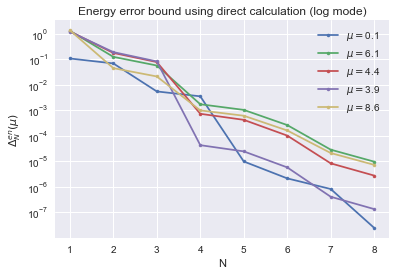

In [19]:
N = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

printTableDelta(DeltaList, muVals)

for i, mu in enumerate(muVals):   
    ax.plot(N,DeltaList[:,i],".-", label="$\mu=$"+str(mu[0])[:3])
ax.set_xlabel("N")
ax.set_ylabel("$\Delta_N^{en}(\mu)$")
ax.set_yscale("log")
ax.set_title("Energy error bound using direct calculation (log mode)")
ax.legend();

#### Offline/Online version of the a posteriori error bound

The calculation will follow the lecture's formula presented in the picture below. In our implementation, The term $\underline{C}$ is simply noted as $C$, and $\underline{\mathcal{A}}^q$ as $L^q$. These quantities are solutions to the equations:
- $\bar{\mathcal{A}}^{\mathcal{N}} \, C = \mathcal{F}^{\mathcal{N}}$
- $\bar{\mathcal{A}}^{\mathcal{N}} \, L^q = - \mathcal{A}^{\mathcal{N}q} Z$ = $G^q$, $\qquad q=1\ldots Q_a \qquad (Q_a = Q = Q_{max})$ 

Finaly, the quantities in <span style="color:blue">blue</span> are computed and stored offline for $N=N_{max}$. In the code that follows, we noted them (repectively) as $CC_{off}$, $CL_{off}^q$, and $LL_{off}^{q,q'}$; where the latter two (a $N$-sized vector and a $N\times N$ matrix) are stored in lists. The quantities in <span style="color:red">red</span> are computed online.

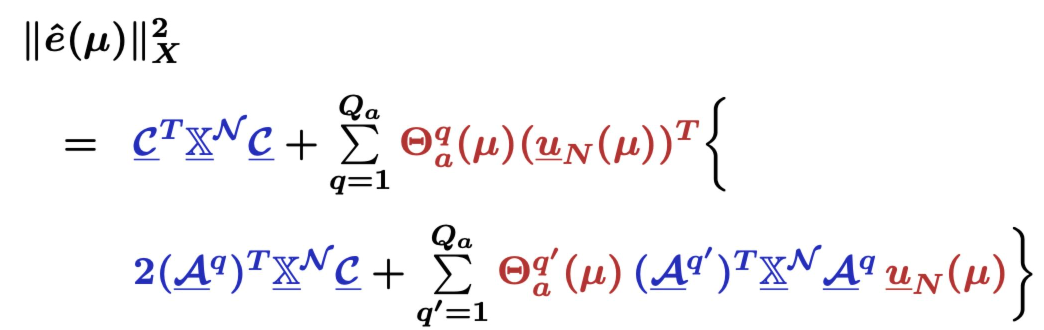

In [6]:
Image("img/OffOn.png", width=400)

In [11]:
## Lower bound for alpha using Min-Theta
def minThetaLB(mu, case):
    if case=="case1":
        return min(mu[0], 1)
    if case=="case2":
        return min([mu[0], 1, 10*mu[-1]])

In [21]:
alphaLBValsRB = [minThetaLB(mu,"case1") for mu in muVals]
print(alphaLBValsRB)

[0.12801412850112873, 1, 1, 1, 1]


In [12]:
## Norm of the Riesz representation - OFFLINE PHASE
def buildOfflineCCL(Ahq, Fh, AhqBar, Z):
    Nmax = Zfull.shape[1]
    Qmax = 6

    C = spsolve(AhqBar, Fh)
    CCoff = C.T@AhqBar@C

    L = []
    for q in range(1,Qmax+1):
        Gq = -Ahq[q-1]@Z
        Lq = spsolve(AhqBar, Gq)
        L.append(Lq)

    CLoff = []
    for q in range(1,Qmax+1):
        CLoff.append(C.T@AhqBar@L[q-1])

    LLoff = []
    for q in range(1, Qmax+1):
        Lq = L[q-1]
        LLtemp = []
        for q_ in range(1, Qmax+1):
            Lq_ = L[q_-1]
            LLtemp.append(Lq.T@AhqBar@Lq_)
        LLoff.append(LLtemp)

    return CCoff, CLoff, LLoff

In [24]:
Zfull = buildZorth(sample1, Ahq, Fh, "case1",AhqBar, Nmax)      ## Full RB matrix
CCoff, CLoff, LLoff = buildOfflineCCL(Ahq, Fh, AhqBar, Zfull)

print("CCoff:", CCoff)
print("CLoff shape:", len(CLoff))
print("LLoff shape:", len(LLoff), "x", len(LLoff[0]))

CCoff: 1.5987665270309828
CLoff shape: 6
LLoff shape: 6 x 6


In [13]:
## Norm of the Riesz representation - ONLINE PHASE
def RieszNormRB(mu, un, CCoff, CLoff, LLoff, N):
    Qmax = 6
    eHatNorm = CCoff
    for q in range(1, Qmax+1):
        eHatNorm += 2*mu[q-1]*un.T@(CLoff[q-1][:N])       ## Up to the N'th element
        for q_ in range(1, Qmax+1):
            eHatNorm += mu[q-1]*mu[q_-1]*un.T@(LLoff[q-1][q_-1][:N,:N])@un     ## The first N*N elements
    return np.sqrt(eHatNorm)

In [26]:
DeltaListRB = []
Nmax = 8
for N in range(1,Nmax+1):
    Z = buildZorth(sample1, Ahq, Fh, "case1",AhqBar, N)

    Delta = []
    # for i in range(len(muVals)):
    #     mu = muVals[i]
    for mu in muVals:
        alphaLB = minThetaLB(mu, "case1")

        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveFE(mu, Anq, Fn)

        eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
        Delta.append(eHatNorm/np.sqrt(alphaLB))

    DeltaListRB.append(Delta)

DeltaListRB = np.array(DeltaListRB)

----- Energy error bound -------


,N,mu=0.1,mu=6.1,mu=4.4,mu=3.9,mu=8.6
0,1,1.071147e-01,1.308322,1.233551,1.202772e+00,1.368568
1,2,6.857648e-02,0.124021,0.176679,1.906322e-01,0.044769
2,3,5.481381e-03,0.056756,0.077549,8.219422e-02,0.021172
3,4,3.522630e-03,0.001723,0.000728,4.297355e-05,0.000989
4,5,9.873269e-06,0.001037,0.000422,2.453648e-05,0.000612
5,6,2.145798e-06,0.000263,0.000102,5.781615e-06,0.000162
6,7,8.233370e-07,0.000029,0.000008,4.089824e-07,0.000021
7,8,2.459887e-08,0.000010,0.000003,1.344554e-07,0.000007


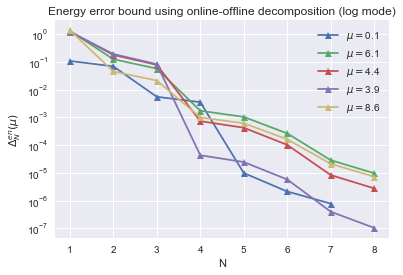

In [27]:
N = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

printTableDelta(DeltaList, muVals)
ax = [ax]
for i, mu in enumerate(muVals):   
    ax[0].plot(N,DeltaListRB[:,i], "^-", label="$\mu=$"+str(mu[0])[:3])
ax[0].set_xlabel("N")
ax[0].set_ylabel("$\Delta_N^{en}(\mu)$")
ax[0].set_yscale("log")
ax[0].set_title("Energy error bound using online-offline decomposition (log mode)")
ax[0].legend();

We can see that the results perfectly match the ones we obtained using a direct computation. We can conclude that while being extemely faster, the proposed online-offline decomposition is as accurate as the direct calculation when it comes to computing the error bound. 

#### b) Computing the effectivities

In [29]:
## Let's generate the test sample
Glin = list(np.linspace(0.1,10, 50))
Gln = list(np.exp(np.linspace(np.log(0.1), np.log(10), 50)))
testSample = Glin + Gln
assert (len(testSample)==100)

print(len(testSample))

100


In [14]:
## Function to easily compute the energy norm effectivity 
def computeEffectivityRB(u, un, Z, Ah, mu, case):
    alphaLB = minThetaLB(mu,case)

    N = Z.shape[1]
    eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
    Delta = eHatNorm/np.sqrt(alphaLB)

    e = u - Z@un
    eNorm = np.sqrt(e.T@Ah@e)       ## Energy norm
    if (norm(e, AhqBar) >= 10e-7):
        return Delta/eNorm
    else:
        return np.nan               ## Exclude if the X-norm is too low

In [31]:
etaList = []
Nmax = 8
Zfull = buildZorth(sample1, Ahq, Fh, "case1",AhqBar, Nmax)      ## Full RB matrix

for i in range(len(testSample)):
    mu = buildMu(testSample[i], 0.1, "case1")
    
    u = solveFE(mu, Ahq, Fh)
    Ah = assembleA(mu, Ahq)

    eta = []
    for N in range(1,Nmax+1):

        Anq, Fn, Ln = buildOfflineAFL(Zfull[:, :N], Ahq, Fh)
        un = solveRB(mu, Anq, Fn)
        effectivity = computeEffectivityRB(u, un, Zfull[:, :N], Ah, mu, "case1")

        eta.append(effectivity)
    
    etaList.append(eta)

etaList = np.array(etaList)

In [32]:
## A function to print tables in the form of dataframes
def printTableEta(minEta, maxEta, meanEta, mask):
    print("-------- Minimum, maximum, and average effectivity --------")
    
    df = pd.DataFrame({"N":np.array(mask)+1})
    df["Min"] = minEta[mask]
    df["Max"] = maxEta[mask]
    df["Mean"] = meanEta[mask]

    display(df)

-------- Minimum, maximum, and average effectivity --------


,N,Min,Max,Mean
0,1,1.009650,1.673362,1.238664
1,2,1.008232,2.480684,1.613751
2,3,1.005982,2.632901,1.654871
3,4,1.009582,2.387424,1.591197
4,5,1.005902,2.618965,1.647289
5,6,1.010495,2.328430,1.574890
6,7,1.003657,2.811188,1.699008
7,8,1.006671,2.578407,1.639719


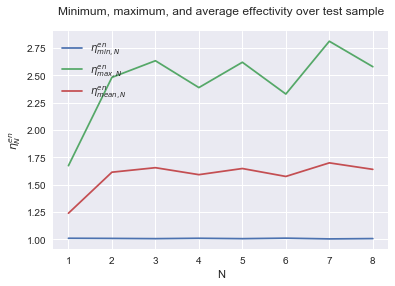

In [33]:
minEta = np.nanmin(etaList, axis=0)
maxEta = np.nanmax(etaList, axis=0)
meanEta = np.nanmean(etaList, axis=0)

## Print table
mask = [0,1,2,3,4,5,6,7]
printTableEta(minEta, maxEta, meanEta, mask)

N = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(N,minEta, label="$\eta_{min,N}^{en}$")
ax.plot(N,maxEta, label="$\eta_{max,N}^{en}$")
ax.plot(N,meanEta, label="$\eta_{mean,N}^{en}$")

ax.set_xlabel("N")
# ax.set_ylabel("$\\frac{\Delta_N^{en}(\mu)}{\Vert e(u) \Vert}$")
ax.set_ylabel("$\eta_{N}^{en}$")
ax.set_title("Minimum, maximum, and average effectivity over test sample", y=1.05)
ax.legend();

After exluding from the operation all points in the test sample for which $\Vert u(\mu)-u_N(\mu) \Vert$ is less than $1e-8$, we can see that the minimum effectivity is always greater than 1. On the same graph (or in the same table), we can see that the maximum effectivity if always smaller than the theoretical upper bound we computed in Q2., where we had $\eta_N^{en}(\mu) \leq \sqrt{10} \approx 3.16$.

#### c) Evaluate the effectivity for $\mu=1$

In [34]:
Nmax = 8
mu = buildMu(1, 0.1, "case1")

u = solveFE(mu, Ahq, Fh)
Ah = assembleA(mu, Ahq)

eta = []
for N in range(1,Nmax+1):

    Anq, Fn, Ln = buildOfflineAFL(Zfull[:, :N], Ahq, Fh)
    un = solveRB(mu, Anq, Fn)
    effectivity = computeEffectivityRB(u, un, Zfull[:, :N], Ah, mu, "case1")

    eta.append(effectivity)

eta = np.array(eta)

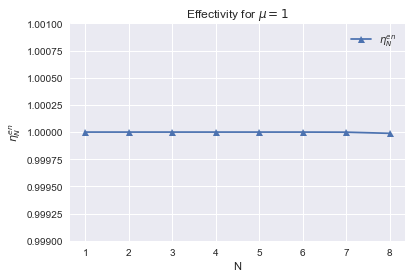

In [39]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1,Nmax+1)
ax.plot(Nvalues,eta, '^-', label="$\eta_{N}^{en}$")

ax.set_xlabel("N")
ax.set_ylabel("$\eta_{N}^{en}$")
# ax.set_yscale("log")
ax.set_ylim(0.999, 1.001)
ax.set_title("Effectivity for $\mu=1$")
ax.legend();

For $\mu =1 = \bar{\mu}$, the effectivity always equals 1. This is because the energy norm is the same as the X-norm. In this case, the upper bound for $\eta_{N}^{en}(\mu)$ is given by $\sqrt{\frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}}$ = $\sqrt{\frac{\gamma_{UB}(\bar{\mu})}{\alpha_{LB}(\bar{\mu})}}$. It's clear that $\alpha_{LB}(\bar{\mu}) = 1$ and $\gamma_{UB}(\bar{\mu})=1$, following the definition of the X-norm $\Vert u \Vert_X = a(u,u;\bar{\mu})$. Since $1$ is also an undeniable lower bound for $\eta_{N}^{en}(\mu)$, we get $\eta_{N}^{en}(\mu) = 1$.

#### d) Exact error and error bound for $\mu=0.1$

In [69]:
Nmax = 8
mu = buildMu(0.1, 0.1, "case1")

u = solveFE(mu, Ahq, Fh)
Ah = assembleA(mu, Ahq)

exact = []
bound = []
boundFE = []
for N in range(1,Nmax+1):

    ## Exact error
    Z = Zfull[:,:N]
    Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
    un = solveRB(mu, Anq, Fn)
    e = u - Z@un
    exact.append(norm(e, AhqBar))       ## X norm

    ## Error bound
    alphaLB = minThetaLB(mu, "case1")             ## In RB basis
    # alphaLB = computeConstants(mu,Ahq,AhqBar)[0]    ## In FE basis
    eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)             ## In RB basis
    eHatNormFE = RieszNorm(mu, Ah, Fh, un, Z, AhqBar)      ## In FE basis
    bound.append(eHatNorm/np.sqrt(alphaLB))
    boundFE.append(eHatNormFE/np.sqrt(alphaLB))

exact = np.array(exact)
bound = np.array(bound)
boundFE = np.array(boundFE)

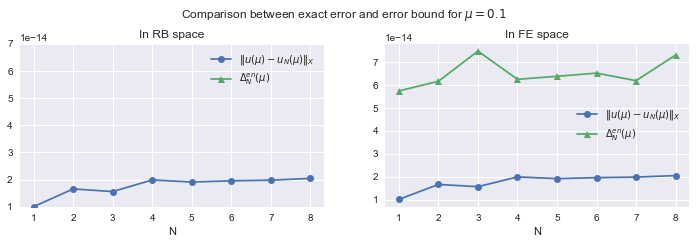

In [70]:
fig,ax = plt.subplots(1,2,figsize=(12,3))

Nvalues = np.arange(1,Nmax+1)
ax[0].plot(Nvalues,exact, "o-", label="$\Vert u(\mu)-u_N(\mu) \Vert_X$")
ax[0].plot(Nvalues,bound, "^-",label="$\Delta_N^{en}(\mu)$")

ax[0].set_xlabel("N")
ax[0].set_title("In RB space")
ax[0].set_ylim(1e-14, 7e-14)
ax[0].legend();

ax[1].plot(Nvalues,exact, "o-", label="$\Vert u(\mu)-u_N(\mu) \Vert_X$")
ax[1].plot(Nvalues,boundFE, "^-",label="$\Delta_N^{en}(\mu)$")

ax[1].set_xlabel("N")
ax[1].set_title("In FE space")
ax[1].legend();

plt.suptitle("Comparison between exact error and error bound for $\mu=0.1$", y=1.05);

The exact error is close to zero (close to the machine epsilon or the floating point precision $1e-14$). This is because the value $\mu=0.1$ was used for the construction of our orthonormalized RB space. Since the error vector is null, the residual is a null-point function, and the norm of its Riesz representation is undefined, meaning the error bound cannot be computed in RB space. However, computing the error bound in FE space yields the right-hand plot seen above, thus providing an error bound possible only with direct calcultation.

### Q4.

In [86]:
## Global paremeters for question Q4. 
Ahq, Fh = loadFEMatrix("medium")
muBar = buildMuBar()
AhqBar = assembleA(muBar, Ahq)
sample3 = loadSample("sample3")

Nmax = 46
Zfull = buildZorth(sample3, Ahq, Fh, "case2", AhqBar, N=Nmax)
Anq, Fn, Ln = buildOfflineAFL(Z,Ahq,Fh)

#### a) Let's start with a direct calculation (for later comparison)

In [87]:
kiVals = list(np.random.uniform(0.1, 10, 5))
BiVals = list(np.random.uniform(0.01, 1, 5))

In [88]:
Nmax = 46

DeltaList = []
for i in range(len(kiVals)):
    mu = buildMu(kiVals[i], BiVals[i], "case2")

    Ah = assembleA(mu, Ahq)
    
    alphaLB = minThetaLB(mu,"case2")                ## To go faster!
    # alphaLB = computeConstants(mu,Ahq,AhqBar)[0]

    Delta = []
    for N in range(1,Nmax+1):

        Z = Zfull[:, :N]
        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        eHatNorm = RieszNorm(mu, Ah, Fh, un, Z, AhqBar)
        Delta.append(eHatNorm/np.sqrt(alphaLB))

    DeltaList.append(Delta)

DeltaList = np.array(DeltaList)

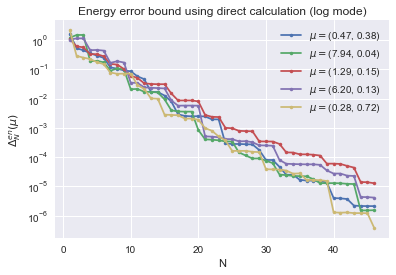

In [89]:
Nvalues = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

# printTableDelta(DeltaList, muVals)

for i, mu in enumerate(zip(kiVals, BiVals)):
    ax.plot(Nvalues,DeltaList[i,:],".-", label="$\mu=$"+"(%0.2f"%mu[0]+", %0.2f)"%mu[1])
ax.set_xlabel("N")
ax.set_ylabel("$\Delta_N^{en}(\mu)$")
ax.set_yscale("log")
ax.set_title("Energy error bound using direct calculation (log mode)")
ax.legend();

#### Online-offline decomposition

In [90]:
CCoff, CLoff, LLoff = buildOfflineCCL(Ahq, Fh, AhqBar, Zfull)

In [91]:
Nmax = 46

DeltaListRB = []
for i in range(len(kiVals)):
    mu = buildMu(kiVals[i], BiVals[i], "case2")

    Ah = assembleA(mu, Ahq)
    
    alphaLB = minThetaLB(mu, "case2")

    Delta = []
    for N in range(1,Nmax+1):

        Z = Zfull[:, :N]
        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
        Delta.append(eHatNorm/np.sqrt(alphaLB))

    DeltaListRB.append(Delta)

DeltaListRB = np.array(DeltaListRB)

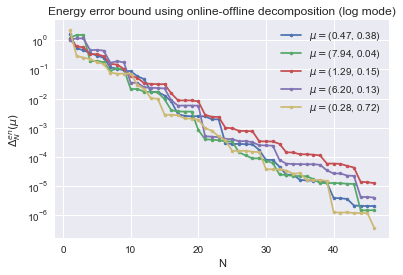

In [92]:
Nvalues = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

# printTableDelta(DeltaList, muVals)

for i, mu in enumerate(zip(kiVals, BiVals)):
    ax.plot(Nvalues,DeltaListRB[i,:],".-", label="$\mu=$"+"(%0.2f"%mu[0]+", %0.2f)"%mu[1])
ax.set_xlabel("N")
ax.set_ylabel("$\Delta_N^{en}(\mu)$")
ax.set_yscale("log")
ax.set_title("Energy error bound using online-offline decomposition (log mode)")
ax.legend();

It is clear from the two preceding plots that the direct calculation and the online-offline decomposition produce the same results, just as in Case I.

#### b) Let's compute the effectivities

In [3]:
## The test sample
GlinKi, GlnKi = list(np.linspace(0.1,10, 10)), list(np.exp(np.linspace(np.log(0.1), np.log(10), 10)))
GlinBi, GlnBi = list(np.linspace(0.01,1, 10)), list(np.exp(np.linspace(np.log(0.01), np.log(1), 10)))

Glin, Gln = [], []

for element in itertools.product(GlinKi, GlinBi):
    Glin.append(element)

for element in itertools.product(GlnKi, GlnBi):
    Gln.append(element)

testSample = Glin + Gln

assert (len(testSample)==200)
# print(testSample[123])

Now let's compute the effectivities. 
> Warning: The cell below takes long to run!

In [98]:
etaList = []
Nmax = 46

for i in range(len(testSample[:])):

    mu = buildMu(testSample[i][0], testSample[i][1], "case2")
    
    u = solveFE(mu, Ahq, Fh)
    Ah = assembleA(mu, Ahq)

    eta = []
    for N in range(1,Nmax+1):

        Anq, Fn, Ln = buildOfflineAFL(Zfull[:, :N], Ahq, Fh)
        un = solveRB(mu, Anq, Fn)
        effectivity = computeEffectivityRB(u, un, Zfull[:, :N], Ah, mu, "case2")

        eta.append(effectivity)
    
    etaList.append(eta)

etaList = np.array(etaList)

-------- Minimum, maximum, and average effectivity --------


,N,Min,Max,Mean
0,5,1.017255,6.685083,2.058090
1,10,1.031082,6.906718,2.135940
2,20,1.053642,6.895852,2.143169
3,30,1.054003,7.031647,1.980982
4,40,1.043993,3.262740,1.676565


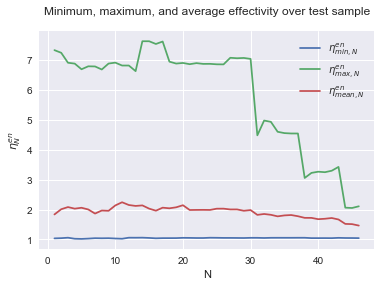

In [99]:
minEta = np.nanmin(etaList, axis=0)
maxEta = np.nanmax(etaList, axis=0)
meanEta = np.nanmean(etaList, axis=0)

## Print table
mask = [4,9,19,29,39]
printTableEta(minEta, maxEta, meanEta, mask)

Nvalues = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(Nvalues,minEta, label="$\eta_{min,N}^{en}$")
ax.plot(Nvalues,maxEta, label="$\eta_{max,N}^{en}$")
ax.plot(Nvalues,meanEta, label="$\eta_{mean,N}^{en}$")

ax.set_xlabel("N")
# ax.set_ylabel("$\\frac{\Delta_N^{en}(\mu)}{\Vert e(u) \Vert}$")
ax.set_ylabel("$\eta_{N}^{en}$")
ax.set_title("Minimum, maximum, and average effectivity over test sample", y=1.05)
ax.legend();

The minimum effectivity is effectively greater than unity. Just as in Case I, this result was expected. However, all points in the test sample with an error X-norm smaller than $1e-7$ had to be exluded from the study, compared to $1e-8$ for Case I.

We also note that the maximum effectivity is smaller than the theoretical limit derived at Q2. (where we found $\eta_N^{en}(\mu) \leq 10$). Below, we have implemented an algorithm to numerically test the derived theoretical upper bound for the effectivity, using the min-theta and the max-theta algorithms.

#### Let's test our theoretical upper bound for the effectivy
Let's compute the theoretical upper bounds for the effectivy. In energy norm, we have shown that:
$$
1 \leq \eta_{N}^{en} \leq \sqrt \frac{\gamma_{UB}(\mu)}{\alpha_{LB}(\mu)}
$$

The lower and upper bounds for $\alpha(\mu)$ and $\gamma(\mu)$ are computed down below using the min-theta and max-theta algorithms respectively (the computation by solving a generalized eigen value problem would have been too costly). Beside, we have already showed above that these two techniques return the same results.

In [100]:
## Gamma upper bound using Max-Theta
def maxThetaUB(mu, case):
    if case=="case1":
        return max(mu[0], 1)
    if case=="case2":
        return max(mu[0], 10*mu[-1])

In [101]:
etaBoundList = []
Nmax = 46

# for i in range(len(testSample)):
for i in range(len(testSample)):
    mu = buildMu(testSample[i][0], testSample[i][1], "case2")
    
    # u = solveFE(mu, Ahq, Fh)
    Ah = assembleA(mu, Ahq)

    eta = []
    for N in range(1,Nmax+1):
        # alphaLB, gammaUB = computeConstants(mu,Ahq,AhqBar)    ##-- Too slow --
        alphaLB = minThetaLB(mu,"case2")
        gammaUB = maxThetaUB(mu,"case2")
        
        eta.append(np.sqrt(gammaUB/alphaLB))

    etaBoundList.append(eta)

etaBoundList = np.array(etaBoundList)
etaBoundList = np.max(etaBoundList, axis=0)

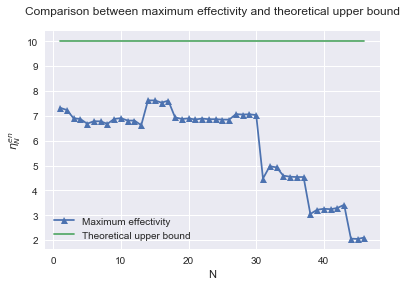

In [102]:
# np.save("etaBoundList.npy", etaBoundList)

fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(Nvalues, maxEta, "^-", label="Maximum effectivity")
ax.plot(Nvalues, etaBoundList, label="Theoretical upper bound")

ax.set_xlabel("N")
# ax.set_ylabel("$\\frac{\Delta_N^{en}(\mu)}{\Vert e(u) \Vert}$")
ax.set_ylabel("$\eta_{N}^{en}$")
ax.set_title("Comparison between maximum effectivity and theoretical upper bound", y=1.05)
ax.legend();

This confirms what we have written above, that the theoretical upper bound is effectively always greater than the numerical maximum effectivity.

## Part 3 - Reduced Basis Output Bound

### Q5.

In [56]:
## Global paremeters for question Q5. 
Ahq, Fh = loadFEMatrix("medium")
muBar = buildMuBar()
AhqBar = assembleA(muBar, Ahq)
sample3 = loadSample("sample3")

Nmax = 46
Zfull = buildZorth(sample3, Ahq, Fh, "case2", AhqBar, N=Nmax)
Anq, Fn, Ln = buildOfflineAFL(Z,Ahq,Fh)

#### a) Calculate the output error bound

In terms of energy norm, the output error bound is the squared value of the energy error bound.
$$
\Delta^s_N(\mu) = \Delta^{en}_N(\mu)^2 
$$

In [57]:
kiVals = list(np.random.uniform(0.1, 10, 5))
BiVals = list(np.random.uniform(0.01, 1, 5))

In [58]:
CCoff, CLoff, LLoff = buildOfflineCCL(Ahq, Fh, AhqBar, Zfull)

In [59]:
Nmax = 46

DeltaSList = []
for i in range(len(kiVals)):
    mu = buildMu(kiVals[i], BiVals[i], "case2")

    alphaLB = minThetaLB(mu,"case2")

    DeltaS = []
    for N in range(1,Nmax+1):

        Z = Zfull[:, :N]
        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
        DeltaS.append((eHatNorm/np.sqrt(alphaLB))**2)

    DeltaSList.append(DeltaS)

DeltaSList = np.array(DeltaSList)

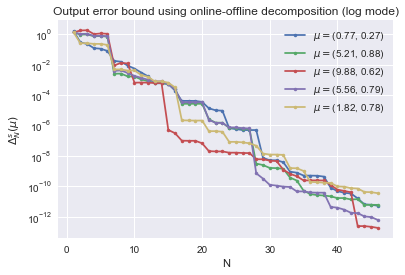

In [60]:
Nvalues = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

for i, mu in enumerate(zip(kiVals, BiVals)):
    ax.plot(Nvalues,DeltaSList[i,:],".-", label="$\mu=$"+"(%0.2f"%mu[0]+", %0.2f)"%mu[1])
ax.set_xlabel("N")
ax.set_ylabel("$\Delta_N^{s}(\mu)$")
ax.set_yscale("log")
ax.set_title("Output error bound using online-offline decomposition (log mode)")
ax.legend();

As we can see, the code has been extended to compute the output error bound. As the energy error in Part 2, the output error converges as $N$ gets bigger.

#### b) Let's calculate the minimum, maximum, and average output effectivity

The formula for the output effectivity is given by
$$
\eta_{N}^s = \frac{\Delta^s_N(\mu)}{\vert s(\mu)-s_N(\mu) \vert}
$$

In [109]:
## Function to easily compute the output effectivity 
def computeOutputEffectivityRB(u, un, Z, Ah, Lh, Ln, mu, case):
    alphaLB = minThetaLB(mu,case)

    N = Z.shape[1]
    eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
    DeltaS = eHatNorm**2/alphaLB

    e = Lh.T@u - Ln.T@un
    eNorm = np.abs(e)

    if (eNorm >= 10e-11):
        return DeltaS/eNorm
    else:
        return np.nan 

In [112]:
etaSList = []
Nmax = 46

for i in range(len(testSample[:])):

    mu = buildMu(testSample[i][0], testSample[i][1], "case2")
    
    u = solveFE(mu, Ahq, Fh)
    Ah = assembleA(mu, Ahq)

    eta = []
    for N in range(1,Nmax+1):

        Anq, Fn, Ln = buildOfflineAFL(Zfull[:, :N], Ahq, Fh)
        un = solveRB(mu, Anq, Fn)
        effectivity = computeOutputEffectivityRB(u, un, Zfull[:, :N], Ah, Fh, Ln, mu, "case2")

        eta.append(effectivity)
    
    etaSList.append(eta)

etaSList = np.array(etaSList)

-------- Minimum, maximum, and average effectivity --------


,N,Min,Max,Mean
0,5,1.034808,44.690338,5.104766
1,10,1.063130,47.702502,5.730601
2,20,1.110162,21.244971,4.450673
3,30,1.110923,18.538842,3.378774
4,40,1.089926,4.594384,2.051845


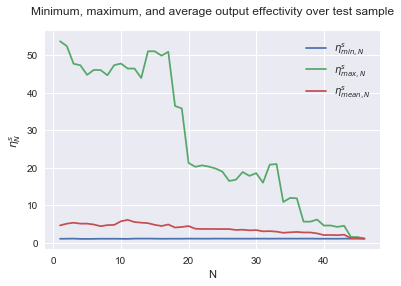

In [113]:
minEta = np.nanmin(etaSList, axis=0)
maxEta = np.nanmax(etaSList, axis=0)
meanEta = np.nanmean(etaSList, axis=0)

## Print table
mask = [4,9,19,29,39]
printTableEta(minEta, maxEta, meanEta, mask)

Nvalues = np.arange(1,Nmax+1)
fig,ax = plt.subplots(1,1,figsize=(6,4))

ax.plot(Nvalues,minEta, label="$\eta_{min,N}^{s}$")
ax.plot(Nvalues,maxEta, label="$\eta_{max,N}^{s}$")
ax.plot(Nvalues,meanEta, label="$\eta_{mean,N}^{s}$")

ax.set_xlabel("N")
ax.set_ylabel("$\eta_{N}^{s}$")
ax.set_title("Minimum, maximum, and average output effectivity over test sample", y=1.05)
ax.legend();

This plot (and the preceding table) confirm that the maximum output effectivity is always smaller than the theoretical upper bound $\eta_N^s(\mu) \leq 100$ computed at Q2.. Compared with the energy effectivity from Q4. (where a limit was imposed on the error X-norm), there was no need to remove from the operation all points for which the output error was smaller than $1e-7$, that is why we left $1e-11$ as suggested in the question statement.

#### c) Required value for an acuracy of 1% 

In [114]:
ntest=200

## A list to hold the accuracies in the sample
accList = np.zeros(shape=(ntest))
acc = 100

N = 1

while acc > 1. and N < Nmax+1:
    N += 1

    Anq,Fn,Ln = buildOfflineAFL(Zfull[:,:N],Ahq,Fh)

    for k in range(ntest):
        mu = buildMu(testSample[k][0], testSample[k][1], "case2")

        u = solveFE(mu,Ahq,Fh)
        Troot = Fh.T@u

        un = solveRB(mu, Anq, Fn)
        Trootn = Ln.T@un

        accList[k] = abs(Troot-Trootn) * 100 / abs(Troot)

    acc = np.max(accList)

In [120]:
print("Required value of N for a 1% accuracy:", N)
# print("True relative error for N =",N, "is about: %0.4f"%(acc), "%")
print("True error for N =",N, "is about: %0.6f"%(acc*abs(Troot)/100))

Required value of N for a 1% accuracy: 10
True error for N = 10 is about: 0.002687


The value of $N$ required to achieve a relative accuracy in the output bound of approximately $1\%$ is $N=10$, and the true error for this value of $N$ is $\vert\Gamma_{root}(\mu)-\Gamma_{root,N}(\mu) \vert = 0.002687$.

#### d) Online computational cost comparison

Comparison between the time it takes to calculate the output error bound  $\Delta^s_N(\mu)$ to the time it takes to calculate $s_N(\mu)$ as a function of $N$. The reported execution times will be averages, over 10 runs, of the same codes.

In [7]:
## Functions to be timed, they all use global variables
def TimedDelta():
    alphaLB = minThetaLB(mu, "case2")
    
    Z = Zfull[:, :N]
    Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
    un = solveRB(mu, Anq, Fn)

    eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)
    return (eHatNorm/np.sqrt(alphaLB))**2

def TimedOutoutOnline():        ## Typo: TimedOutputOnline
    Z = Zfull[:, :N]
    Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
    un = solveRB(mu, Anq, Fn)

    return Ln.T@un
    
def TimedOutoutOffline():       ## Typo: TimedOutputOffline
    u = solveFE(mu, Ahq, Fh)

    return Fh.T@u

In [124]:
Nmax = 46

TimesDelta = np.empty((200, Nmax))
TimesOutoutOnline = np.empty((200, Nmax))

for k in range(len(testSample[5:15])):

    mu = buildMu(testSample[i][0], testSample[i][1], "case2")

    for N in range(1, Nmax+1):
        TimesDelta[k,N-1] = timeit.timeit(TimedDelta, number=10)
        TimesOutoutOnline[k,N-1] = timeit.timeit(TimedOutoutOnline, number=10)

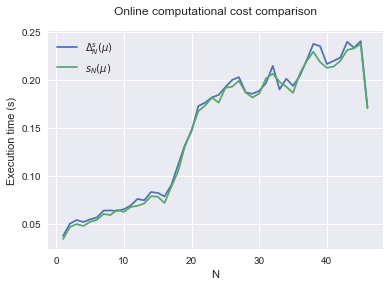

In [134]:
TimesDeltaToPlot = np.nanmean(TimesDelta[:10,:], axis=0)
TimesOutoutOnlineToPlot = np.nanmean(TimesOutoutOnline[:10,:], axis=0)

fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1, Nmax+1)
ax.plot(Nvalues, TimesDeltaToPlot, label="$\Delta^s_N(\mu)$")
ax.plot(Nvalues, TimesOutoutOnlineToPlot, label="$s_N(\mu)$")
ax.set_xlabel("N")
ax.set_ylabel("Execution time (s)")
# ax.set_yscale("log")
ax.set_title("Online computational cost comparison", y=1.05)
ax.legend();

Computing the online phase of $\Delta^s_N(\mu)$ takes almost as much time as the computation of the approximate solution $u_N$. This is an interesting result, as it means we can evaluate the error we are making on our output, without ever needing to compute said output, all that at the same cost. 

#### e) Another computational cost comparison

Comparison between the time it takes to calculate the truth output $s(\mu)$ to what it takes to calculate $s_N(\mu)$ and the output error bound $\Delta^s_N(\mu)$ as a function of $N$. As with the previous comparison, an average over 10 runs is taken.

In [135]:
Nmax = 46

Times1 = np.empty((200, Nmax))
Times2 = np.empty((200, Nmax))
Times3 = np.empty((200, Nmax))

for k in range(len(testSample[:5])):

    mu = buildMu(testSample[i][0], testSample[i][1], "case2")

    for N in range(1, Nmax+1):
        Times1[k,N-1] = timeit.timeit(TimedOutoutOffline, number=10)
        # Times2[k,N-1] = timeit.timeit(TimedDelta, number=10) + timeit.timeit(TimedOutoutOnline, number=10)
        Times2[k,N-1] = timeit.timeit(TimedOutoutOnline, number=10)
        Times3[k,N-1] = timeit.timeit(TimedDelta, number=10)

Times1 = np.mean(Times1[:5], axis=0)
Times2 = np.mean(Times2[:5], axis=0)
Times3 = np.mean(Times3[:5], axis=0)

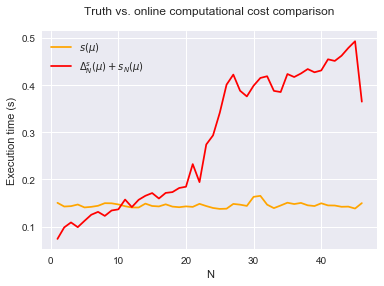

In [140]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1, Nmax+1)
ax.plot(Nvalues, Times1, label="$s(\mu)$", color="orange")
ax.plot(Nvalues, Times2+Times3, label="$\Delta^s_N(\mu) + s_N(\mu)$", color="r")

ax.set_xlabel("N")
ax.set_ylabel("Execution time (s)")
# ax.set_yscale("log")
ax.set_title("Truth vs. online computational cost comparison", y=1.05)
ax.legend();

The computation of $s(\mu)$ is not dependent on $N$, and the plot shows that. The plot also indicates that the online computation of $\Delta^s_N(\mu)$ and $s_N(\mu)$ is more expensive than the computation of $s(\mu)$, when $N \geq 10$. This happens because of the way the norm of the Riesz representation of the residual is computed (using an online-inneficient approach by nested loops). This all means that the RB computation becomes inneficient (compared to the FE calculation) as soon as $N$ reaches $10$.   

## Part 4 - Greedy Sampling Procedure

### Q5.


Let's construct the sample sets $S_N$ ourselves, using the greedy algorithm. A summary of the algorithm from the lecture is presented in the picture below. It is important to note that we added an orthonormalization step to the algorithm. That way, the resulting RB matrix is orthonormalized and ready to use.

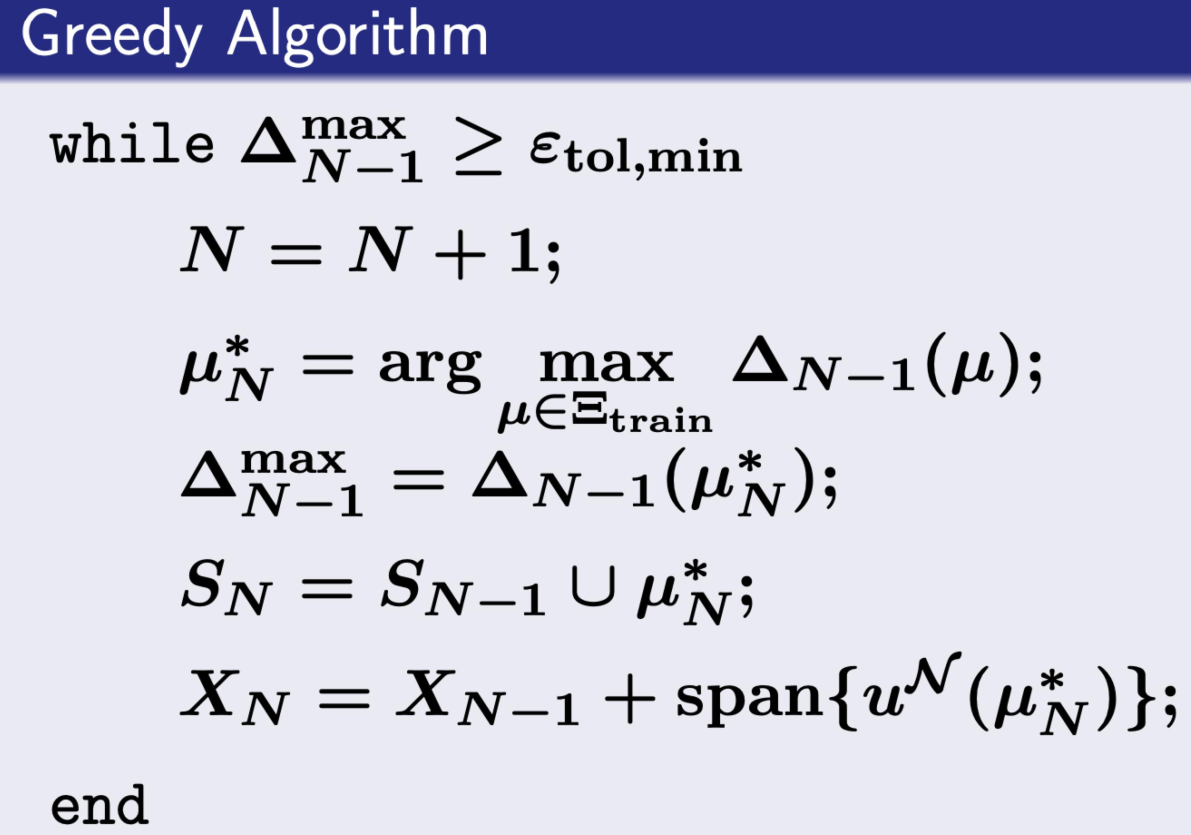

In [8]:
Image("img/GreedyRecap.png", width=400)

During the greedy sampling procedure, only certain terms are computed in order to evaluate the error bound. These terms are indicated in <span style="color:#ff8686">**red-pink**</span> in the picture below. $N_{max}$ is chosen as the size of the train sample. This means that the worst case (no convergence) is achieved when the matrices are filled.

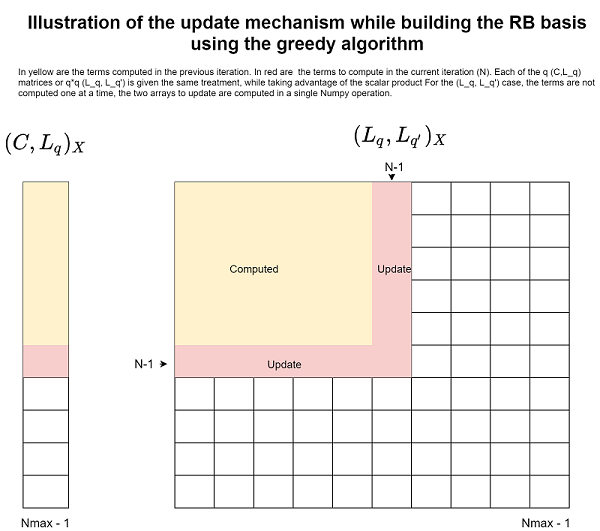

In [15]:
Image("img/GreedyUpdate.png", width=500)

In [16]:
## Build mu in an efficient way, allowing to take in a single element or a tuple
def buildMuEfficient(kiBi, case):
    if case == "case1":
        assert (kiBi >= 0.1 and int(kiBi) <=10)
        return np.array([kiBi, kiBi, kiBi, kiBi, 1, 0.1])
    if case == "case2":
        assert (kiBi[0] >= 0.1 and int(kiBi[0]) <= 10)
        assert (kiBi[1] >= 0.01 and kiBi[1] <= 1)
        return np.array([kiBi[0], kiBi[0], kiBi[0], kiBi[0], 1, kiBi[1]])

## Computes the minimum value for mu over a test sample
def buildMuMin(traimSample, case):
    kiList = [ki for el[0] in traimSample]
    kiMin = np.min(np.array(kiList))

    BiList = [Bi for el[1] in traimSample]
    BiMin = np.min(np.array(BiList))

    assert case=="case1" or case=="case2"

    return buildMu((kiMin, BiMin), case)

## Gram-schmidt
def GramSchmidt(Z, u, AhqBar):
    nbCol = Z.shape[1]
    
    if nbCol == 0 or len(Z) == 0:   ## Z is empty ==> shape is (0,)
        z = u
    else:
        z = u
        for k in range(0, nbCol):
            z -= proj(u, Z[:,k], AhqBar)
        z = z / norm(z, AhqBar)
    
    return z

In [17]:
## Function to compute only the necessary incremental quantities
def updateOfflineCCL(Ahq, Fh, AhqBar, Z, N, C, L, CLoff, LLoff):
    Qmax = 6

    ## The Matrices' shapes are assumed big enough
    assert N >= 1
    assert CLoff[0].shape[0] >= N
    assert LLoff[0][0].shape[0] >= N

    for q in range(1,Qmax+1):
        Gnq = -Ahq[q-1]@Z[:,N-1]
        Lnq = spsolve(AhqBar, Gnq)
        L[q-1][:,N-1] = Lnq                ## Just add a scalar

    ## Update CLoff by adding an element to each of its q matrices (of size N)
    for q in range(1,Qmax+1):
        CLoff[q-1][N-1] = C.T@AhqBar@L[q-1][:,N-1]    ## Just 

    ## Update LLoff by adding a layer to each of its q*q matrices (of size N*N)
    ## Update the row
    for q in range(1, Qmax+1):
        Lnq = L[q-1][:,N-1]
        # print("shape", Lnq.shape)
        for q_ in range(1, Qmax+1):
            Lq_ = L[q_-1][:, :N]
            LLoff[q-1][q_-1][N-1, :N] = Lnq.T@AhqBar@Lq_
    ## Update the column
    for q in range(1, Qmax+1):
        Lq = L[q-1][:, :N]
        for q_ in range(1, Qmax+1):
            Lnq_ = L[q_-1][:, N-1]
            LLoff[q-1][q_-1][:N, N-1] = Lq.T@AhqBar@Lnq_

## Computed max delta over train sample, (we only compute error for N ==N, which should be decreasing)
def maxDelta(trainSample, Z, N, Ahq, Fh, AhqBar, C, L, CCoff, CLoff, LLoff, case):
    ## -------- We should only compute additional terms ----------------
    updateParams = {"N":N,
                    "Z":Z,
                    "Ahq":Ahq,
                    "Fh":Fh,
                    "AhqBar":AhqBar,
                    "C":C,
                    "L":L,
                    "CLoff":CLoff,
                    "LLoff":LLoff}
    updateOfflineCCL(**updateParams)

    ## --------- Most quantities are re-computed ----------------
    # CCoff, CLoff, LLoff = buildOfflineCCL(Ahq, Fh, AhqBar, Z)     

    maxDelta = 0
    muOpt = None

    for el in trainSample:
        mu = buildMuEfficient(el, case)

        Anq, Fn, Ln = buildOfflineAFL(Z, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)
        
        Ah = assembleA(mu, Ahq)
        unNorm = np.sqrt((Z[:,:N]@un).T@Ah@(Z[:,:N]@un)) 

        alphaLB = minThetaLB(mu, case)
        eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)            
        # Delta = eHatNorm/np.sqrt(alphaLB)
        Delta = (eHatNorm/np.sqrt(alphaLB)) / unNorm

        if Delta > maxDelta:
            maxDelta = Delta
            muOpt = mu

    return maxDelta, muOpt

In [18]:
def greedySampling(Nmax, trainSample, Ahq, Fh, AhqBar, C, L, CCoff, CLoff, LLoff, case, tol=10e-6, muMin=None):
    
    if muMin is None:
        mu = buildMuMin(trainSample, case)
    else:
        mu = muMin

    outSample = []                  ## RB samples
    DeltaMax = []
    Z = np.array([])                ## RB basis in construction
    Z = Z[:, np.newaxis]

    N = 1
    while True:
        uh = solveFE(mu,Ahq,Fh)
        
        xi = GramSchmidt(Z, uh, AhqBar)         ## AhqBar needed GS
        xi = xi[:, np.newaxis]

        if N==1:
            Z = np.concatenate([Z, xi])
        else:
            Z = np.concatenate([Z, xi], axis=1)

        if case=="case1":
            outSample.append(mu[0])
        if case=="case2":
            outSample.append((mu[0], mu[-1]))

        deltaParams = { "N":N,
                        "Z":Z,
                        "trainSample":trainSample,
                        "Ahq":Ahq,
                        "Fh":Fh,
                        "AhqBar":AhqBar,
                        "C":C,
                        "L":L,
                        "CCoff":CCoff,
                        "CLoff":CLoff,
                        "LLoff":LLoff,
                        "case":case}

        err, mu = maxDelta(**deltaParams)
        print("Relative error bound after step", N, "is:", err)

        DeltaMax.append(err)

        if N > Nmax or err < tol:
            break        
        
        N += 1

    return Z, outSample, DeltaMax

### Q6.

Let's apply the greedy algorithm to case I.

#### a) Value of $N_{max}$ to achieve the desired accuracy, and plots.

In [19]:
## Global paremeters for question Q6. 
Ahq, Fh = loadFEMatrix("medium")
muBar = buildMuBar()
AhqBar = assembleA(muBar, Ahq)

In [22]:
Nmax = 100          ## Size of the train sample, worst case scenario
Qmax = 6
NCal = AhqBar.shape[0]      ## FE Scpace dimension

## Build the train sample 
Gln = list(np.exp(np.linspace(np.log(0.1), np.log(10), 100)))
trainSample = Gln
assert (len(trainSample)==Nmax)

# Necessary quantities to compute the a-posteriori error
C = spsolve(AhqBar, Fh)
CCoff = C.T@AhqBar@C

L = []
CLoff = []
LLoff = []
for q in range(1, Qmax+1):
    L.append(np.empty(shape=(NCal,Nmax)))
    CLoff.append(np.empty(shape=(Nmax)))
    LLtemp = []
    for q_ in range(1, Qmax+1):
        LLtemp.append(np.empty(shape=(Nmax,Nmax)))
    LLoff.append(LLtemp)
# print(LLoff[0][0].shape)

## Greedy sampling initialisation
muMin = buildMuEfficient(0.1, "case1")

greedyParams = {"Nmax":Nmax,
                "trainSample":trainSample,
                "Ahq":Ahq,
                "Fh":Fh,
                "AhqBar":AhqBar,
                "C":C,
                "L":L,
                "CCoff":CCoff,
                "CLoff":CLoff,
                "LLoff":LLoff,
                "case":"case1",
                "tol":1e-6,
                "muMin":muMin}
Z, outSample, DeltaMax = greedySampling(**greedyParams)

print()
print('RB matrix shape:', Z.shape)
print("RB sample:", outSample)

Relative error bound after step 1 is: 3.0857073627011227
Relative error bound after step 2 is: 0.1931407880672298
Relative error bound after step 3 is: 0.04004245235880654
Relative error bound after step 4 is: 0.005153891879156572
Relative error bound after step 5 is: 0.0012254612614008302
Relative error bound after step 6 is: 0.0006669736735527661
Relative error bound after step 7 is: 1.4880202279930653e-05
Relative error bound after step 8 is: 4.185380277162565e-06
Relative error bound after step 9 is: 7.87590353041474e-07

RB matrix shape: (4760, 9)
RB sample: [0.1, 10.000000000000002, 1.7886495290574354, 0.26560877829466867, 0.6135907273413175, 5.214008287999687, 0.13848863713938736, 0.18307382802953687, 3.125715849688238]


As indicated by the results above, the required value of $N_{max}$ to achieve the desired accuracy of $1e-6$ is $9$. Let's draw a sequence of plots showing what happens at each step of the greedy sampling algorithm. 

In [23]:
RelErrList = []
EnErrBound = []

Nmax = 9            ## We know this thanks to the greedy algorithm

for el in trainSample:

    mu = buildMuEfficient(el, "case1")
    alphaLB = minThetaLB(mu, "case1")
    
    u = solveFE(mu, Ahq, Fh)
    Ah = assembleA(mu, Ahq)

    rel = []
    bound = []
    for N in range(1,Nmax+1):

        Anq, Fn, Ln = buildOfflineAFL(Z[:,:N], Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        e = u - Z[:,:N]@un
        eNorm = np.sqrt(e.T@AhqBar@e)       ## error X norm
        unNorm = np.sqrt((Z[:,:N]@un).T@Ah@(Z[:,:N]@un))        ## u_N energy norm
        rel.append(eNorm/unNorm)

        eHatNorm = RieszNormRB(mu, un, CCoff, CLoff, LLoff, N)            
        Delta = eHatNorm/np.sqrt(alphaLB)
        # bound.append(Delta)
        bound.append(Delta/unNorm)
    
    RelErrList.append(rel)
    EnErrBound.append(bound)

RelErrList = np.array(RelErrList)
EnErrBound = np.array(EnErrBound)

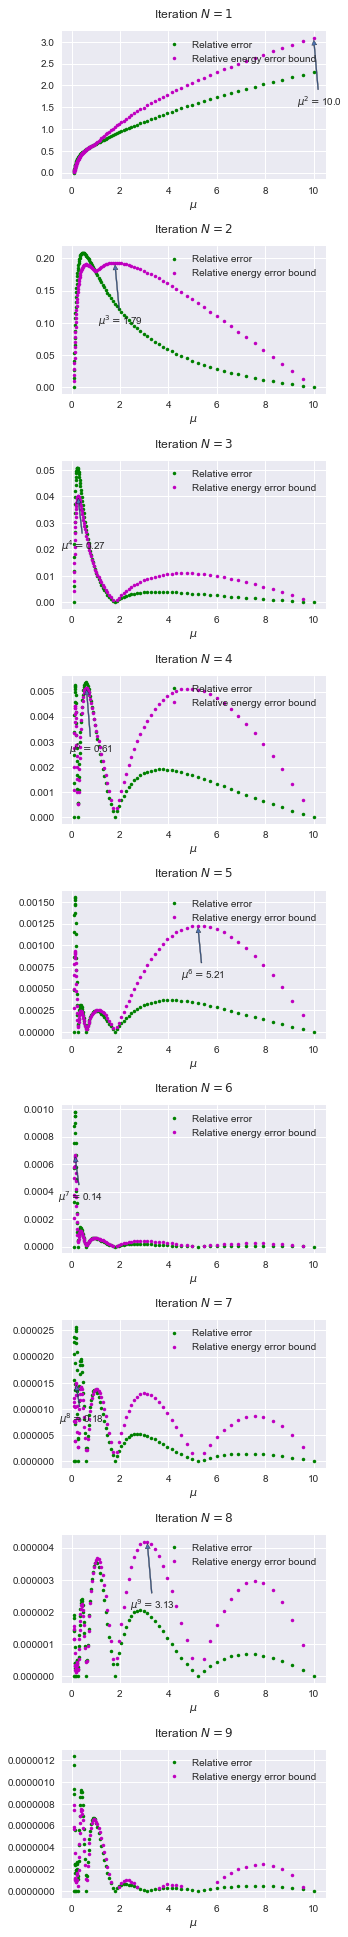

In [24]:
fig, ax = plt.subplots(Nmax, 1, figsize=(5, 3*Nmax))
# ax.reshape(-1)

for N in range(1, Nmax+1):
    ax[N-1].plot(trainSample, RelErrList[:,N-1], 'g.', label="Relative error")
    ax[N-1].plot(trainSample, EnErrBound[:,N-1], 'm.', label="Relative energy error bound")

    if N < Nmax:
        x, y = outSample[N], DeltaMax[N-1]
        ax[N-1].annotate("$\\mu^"+str(N+1)+"=$"+str(round(outSample[N],2)), xy=(x,y), xytext=(x-0.7, y/2), arrowprops=dict(arrowstyle="simple,tail_width=0.1"))

    ax[N-1].set_title("Iteration $N="+str(N)+"$", y=1.05)
    ax[N-1].set_xlabel("$\mu$")
    # ax[N-1].set_ylabel("Errors")
    ax[N-1].legend(loc="upper right");
plt.tight_layout()

As we can see from the plots above, the parameter chosen at each step of the greedy algorithm (pointed by the blue arrow on each plot) is the one that maximizes the relative error bound. 

#### b) Let's plot $\frac{\Delta_N^{max}}{\Vert u_N \Vert_{\mu}}$ as a function of $N$ 

In [148]:
## Computes the absolute error bound
# DeltaAbsMax = []
# for N in range(1,Nmax+1):
    
#     mu = buildMuEfficient(outSample[N-1], "case1")
#     Ah = assembleA(mu, Ahq)
#     Anq, Fn, Ln = buildOfflineAFL(Z[:,:N], Ahq, Fh)
#     un = solveRB(mu, Anq, Fn)

#     unNorm = np.sqrt((Z[:,:N]@un).T@Ah@(Z[:,:N]@un))        ## u_N energy norm
#     DeltaRelMax = DeltaMax[N-1]                                ## Computed during the greedy algorithm

#     DeltaAbsMax.append(DeltaRelMax*unNorm)

# DeltaAbsMax = np.array(DeltaAbsMax)

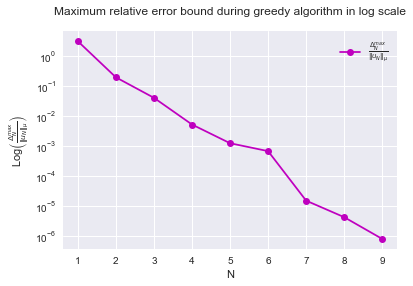

In [25]:
fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1, Nmax+1)
ax.plot(Nvalues, np.array(DeltaMax), 'mo-', label="$\\frac{\Delta_N^{max}}{\Vert u_N \Vert_{\mu}}$")
# ax.plot(Nvalues, DeltaMax, label="$\Delta_N^{rel,max}$")

ax.set_xlabel("N")
ax.set_yscale("log")
ax.set_ylabel("Log$\left( \\frac{\Delta_N^{max}}{\Vert u_N \Vert_{\mu}} \\right)$")
ax.set_title("Maximum relative error bound during greedy algorithm in log scale", y=1.05)
ax.legend();

This shows the convergence of the relative error bound as the greedy algorithm runs. 

#### c) Let's compare the greedy algorithm's RB basis with two non-hierarchical basis

In [26]:
testSample = list(np.linspace(0.1,10, 50)) + list(np.exp(np.linspace(np.log(0.1), np.log(10), 50)))
nTest = 100
assert(len(testSample) == nTest)

In [27]:
def computeEnergyRelError(u, un, Z, Ah):
    e = u - Z@un
    eNorm = np.sqrt(e.T@Ah@e)        ## error energy norm
    uNorm = np.sqrt(u.T@Ah@u)        ## u_N energy norm
    return eNorm/uNorm

In [28]:
Nmax = 9

errorsGreedy = np.empty(shape=(nTest, Nmax-1))
errorsLin = np.empty(shape=(nTest, Nmax-1))
errorsLog = np.empty(shape=(nTest, Nmax-1))

for i in range(nTest):
    mu = buildMuEfficient(testSample[i], "case1")

    Ah = assembleA(mu, Ahq)
    u = solveFE(mu, Ahq, Fh)

    for N in range(2, Nmax+1):
        # sampleGreedy = outSample[:N]
        sampleLin = list(np.linspace(0.1,10, N))
        sampleLog = list(np.exp(np.linspace(np.log(0.1), np.log(10), N)))

        # ZGreedy = buildZorth(sampleGreedy, Ahq, Fh, "case1", AhqBar, N)
        ZGreedy = Z[:,:N]
        ZLin = buildZorth(sampleLin, Ahq, Fh, "case1", AhqBar, N)
        ZLog = buildZorth(sampleLog, Ahq, Fh, "case1", AhqBar, N)

        Anq, Fn, Ln = buildOfflineAFL(ZGreedy, Ahq, Fh)
        unGreedy = solveRB(mu, Anq, Fn)
        Anq, Fn, Ln = buildOfflineAFL(ZLin, Ahq, Fh)
        unLin = solveRB(mu, Anq, Fn)
        Anq, Fn, Ln = buildOfflineAFL(ZLog, Ahq, Fh)
        unLog = solveRB(mu, Anq, Fn)

        errorsGreedy[i, N-2] = computeEnergyRelError(u, unGreedy, ZGreedy, Ah)
        errorsLin[i, N-2] = computeEnergyRelError(u, unLin, ZLin, Ah)
        errorsLog[i, N-2] = computeEnergyRelError(u, unLog, ZLog, Ah)

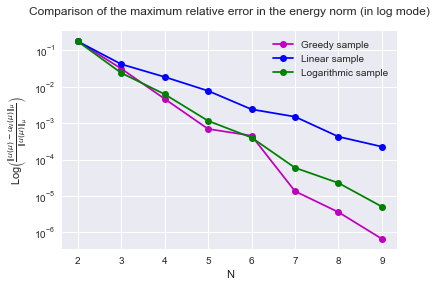

In [29]:
greedyDataToPlot = np.max(errorsGreedy, axis=0)
LinDataToPlot = np.max(errorsLin, axis=0)
LogDataToPlot = np.max(errorsLog, axis=0)

fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(2, Nmax+1)
ax.plot(Nvalues, greedyDataToPlot, 'mo-', label="Greedy sample")
ax.plot(Nvalues, LinDataToPlot, 'bo-', label="Linear sample")
ax.plot(Nvalues, LogDataToPlot, 'go-', label="Logarithmic sample")

ax.set_xlabel("N")
ax.set_yscale("log")
ax.set_ylabel("Log$\left(\\frac{\\Vert u(\mu) - u_N(\mu) \\Vert_{\\mu} }{\\Vert u(\mu)\\Vert_{\\mu}} \\right)$")
ax.set_title("Comparison of the maximum relative error in the energy norm (in log mode)", y=1.05)
ax.legend();

As we can see, the sample obtained from the greedy algorithm converges much faster than the rest. It is interresting to see that the logarithmic choice yields acceptable results, without the need for any algorithm whatsoever. We can even test and show that the logarithmic sample is as good as the greedy algorithm trained on a linear sample. The linear choice is obviously the worst.

### Q7.

Let's apply the greedy algorithm to case II.

#### a) Value of $N_{max}$ to achieve the desired accuracy.

In [30]:
## Global paremeters for question Q7.
Ahq, Fh = loadFEMatrix("medium")
muBar = buildMuBar()
AhqBar = assembleA(muBar, Ahq)

In [31]:
Nmax = 25**2          ## Size of the train sample
Qmax = 6

## Build the train sample 
GlnKi = list(np.exp(np.linspace(np.log(0.1), np.log(10), 25)))
GlnBi = list(np.exp(np.linspace(np.log(0.01), np.log(1), 25)))

trainSample = []
for element in itertools.product(GlnKi, GlnBi):
    trainSample.append(element)

assert len(trainSample) == Nmax

# Necessary quantities to compute the a-posteriori error
C = spsolve(AhqBar, Fh)
CCoff = C.T@AhqBar@C
L = []
CLoff = []
LLoff = []
for q in range(1, Qmax+1):
    L.append(np.empty(shape=(NCal,Nmax)))
    CLoff.append(np.empty(shape=(Nmax)))
    LLtemp = []
    for q_ in range(1, Qmax+1):
        LLtemp.append(np.empty(shape=(Nmax,Nmax)))
    LLoff.append(LLtemp)

## Greedy sampling initialisation
muMin = buildMuEfficient((0.1, 0.01), "case2")

greedyParams = {"Nmax":Nmax,
                "trainSample":trainSample,
                "Ahq":Ahq,
                "Fh":Fh,
                "AhqBar":AhqBar,
                "C":C,
                "L":L,
                "CCoff":CCoff,
                "CLoff":CLoff,
                "LLoff":LLoff,
                "case":"case2",
                "tol":10e-6,
                "muMin":muMin}
Z, greedySample, DeltaMax = greedySampling(**greedyParams)

print()
print('RB matrix shape:', Z.shape)
print("RB sample:", greedySample)

Relative error bound after step 1 is: 10.398563149330613
Relative error bound after step 2 is: 8.191997411172471
Relative error bound after step 3 is: 2.2933554486735708
Relative error bound after step 4 is: 1.0464819450951892
Relative error bound after step 5 is: 0.4962392354670233
Relative error bound after step 6 is: 0.22134903344611576
Relative error bound after step 7 is: 0.18140166231326418
Relative error bound after step 8 is: 0.12997401393453858
Relative error bound after step 9 is: 0.08878915129737963
Relative error bound after step 10 is: 0.07838024761304213
Relative error bound after step 11 is: 0.03739849504537728
Relative error bound after step 12 is: 0.03268852455921171
Relative error bound after step 13 is: 0.023449725211578468
Relative error bound after step 14 is: 0.01650169288192976
Relative error bound after step 15 is: 0.00985657938198359
Relative error bound after step 16 is: 0.009296997474935408
Relative error bound after step 17 is: 0.006962947808026322
Relative 

We can see from the returned results that the value of $N_{max}$ to achieve the desired accuracy is $42$.

#### b) Let's plot $\frac{\Delta_N^{max}}{\Vert u_N \Vert_{\mu}}$ as a function of $N$ 

In [ ]:
# ## Computed the absolute error bound

# Nmax = 42 
# DeltaAbsMax = []    
# for N in range(1,Nmax+1):
    
#     mu = buildMuEfficient(greedySample[N-1], "case2")
#     Ah = assembleA(mu, Ahq)
#     Anq, Fn, Ln = buildOfflineAFL(Z[:,:N], Ahq, Fh)
#     un = solveRB(mu, Anq, Fn)

#     unNorm = np.sqrt((Z[:,:N]@un).T@Ah@(Z[:,:N]@un))           ## u_N energy norm
#     DeltaRelMax = DeltaMax[N-1]                                ## Computed during the greedy algorithm

#     DeltaAbsMax.append(DeltaRelMax*unNorm)
#     # DeltaAbsMax.append(DeltaRelMax)

# DeltaAbsMax = np.array(DeltaAbsMax)

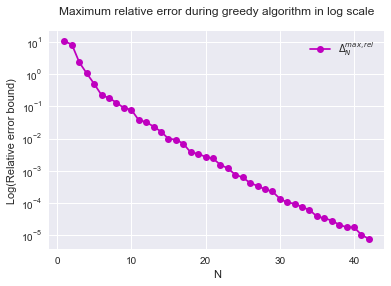

In [158]:
Nmax = 42 
fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1, Nmax+1)
ax.plot(Nvalues, np.array(DeltaMax), 'mo-', label="$\Delta_N^{max, rel}$")
# ax.plot(Nvalues, DeltaMax, label="$\Delta_N^{rel,max}$")

ax.set_xlabel("N")
ax.set_ylabel("Log(Relative error bound)")
ax.set_yscale("log")
ax.set_title("Maximum relative error during greedy algorithm in log scale", y=1.05)
ax.legend();

 This shows the convergence of the relative error bound as the greedy algorithm runs. 

#### c) Let's plot the greedy sample $S_N$

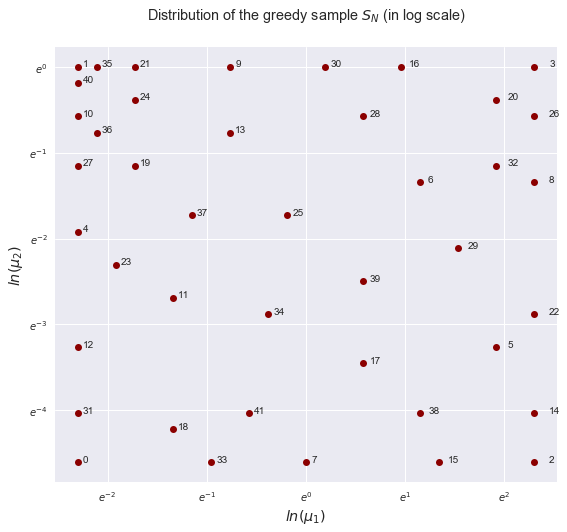

In [55]:
Nmax = 42 

Mu1List = np.empty(shape=(42))
Mu2List = np.empty(shape=(42))
for N in range(1,Nmax+1):
    Mu1List[N-1], Mu2List[N-1] = greedySample[N-1]

fig,ax = plt.subplots(1,1,figsize=(9,8))

# ax.plot(Mu1List, Mu2List, 'mo', label="$S_N$")
# ax.loglog(Mu1List, Mu2List, 'mo', label="$S_N$", base=np.exp(1))
ax.loglog(Mu1List, Mu2List, "o", color="darkred")
for N in range(1,Nmax+1):
    x, y = Mu1List[N-1], Mu2List[N-1]
    ax.annotate(str(N-1), xy=(x,y), xytext=(x+5, y-0.00), textcoords='offset pixels')

ax.set_xlabel("$ln(\mu_1)$", fontsize="x-large")
ax.set_ylabel("$ln(\mu_2)$", fontsize="x-large")
ax.set_xscale("log", basex=np.round(np.exp(1), 3))
ax.set_xticklabels(["$e^{-4}$", "$e^{-3}$", "$e^{-2}$", "$e^{-1}$", "$e^0$", "$e^1$", "$e^2$"])
ax.set_yscale("log", basey=np.round(np.exp(1), 3))
ax.set_yticklabels(["$e^{-6}$", "$e^{-5}$", "$e^{-4}$", "$e^{-3}$", "$e^{-2}$", "$e^{-1}$", "$e^0$"])
ax.set_title("Distribution of the greedy sample $S_N$ (in log scale)", y=1.05, fontsize="x-large");
# ax.legend();

The numbers in the plot above indicate the iteration at which the represented point was picked (the first 4 points are at the 4 corners of the square). The observed distribution of parameter points can be attributed to the mathematical effect known as the Maximum Principle. From a physical point of view, the points are distributed along the border of the domain, indicating that the error is always important closer to the edges. 

#### c) Let's plot the convergence of the maximum relative errors

In [182]:
## Build the test sample
GlinKi, GlnKi = list(np.linspace(0.1,10, 10)), list(np.exp(np.linspace(np.log(0.1), np.log(10), 10)))
GlinBi, GlnBi = list(np.linspace(0.01,1, 10)), list(np.exp(np.linspace(np.log(0.01), np.log(1), 10)))

Glin, Gln = [], []

for element in itertools.product(GlinKi, GlinBi):
    Glin.append(element)

for element in itertools.product(GlnKi, GlnBi):
    Gln.append(element)

testSample = Glin + Gln

nTest= 200
assert (len(testSample)==nTest)

In [210]:
def computeOutputRelError(u, un, Lh, Ln):
    err = Lh.T@u - Ln.T@un
    outErr = np.abs(err)             ## error energy norm
    outNorm = np.abs(Ln.T@un)        ## u_N energy norm
    return outErr/outNorm

In [225]:
Nmax = 42

errorsEnergy = np.zeros(shape=(nTest, Nmax))
errorsOutput = np.zeros(shape=(nTest, Nmax))

for i in range(nTest):
    mu = buildMuEfficient(testSample[i], "case2")

    Ah = assembleA(mu, Ahq)
    u = solveFE(mu, Ahq, Fh)

    for N in range(1, Nmax+1):
        ZGreedy = Z[:,:N]

        Anq, Fn, Ln = buildOfflineAFL(ZGreedy, Ahq, Fh)
        un = solveRB(mu, Anq, Fn)

        if norm(u-ZGreedy@un, AhqBar) > 1e-11:
            errorsEnergy[i, N-1] = computeEnergyRelError(u, un, ZGreedy, Ah)
            errorsOutput[i, N-1] = computeOutputRelError(u, un, Fh, Ln)
        else:   ## Exclude from study
            errorsEnergy[i, N-1] = np.nan
            errorsOutput[i, N-1] = np.nan

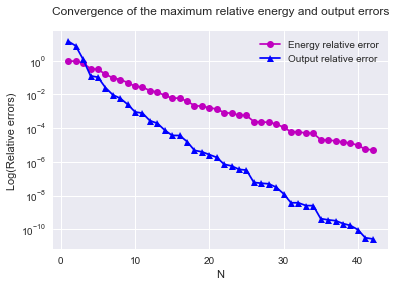

In [226]:
energyDataToPlot = np.nanmax(errorsEnergy, axis=0)
outputDataToPlot = np.nanmax(errorsOutput, axis=0)

fig,ax = plt.subplots(1,1,figsize=(6,4))

Nvalues = np.arange(1, Nmax+1)
ax.plot(Nvalues, energyDataToPlot, 'mo-', label="Energy relative error")
ax.plot(Nvalues, outputDataToPlot, 'b^-', label="Output relative error")

ax.set_xlabel("N")
ax.set_ylabel("Log(Relative errors)")
ax.set_yscale("log")
ax.set_title("Convergence of the maximum relative energy and output errors", y=1.05)
ax.legend();

For the reduced basis approximation we generated, we have plotted the convergence of the maximum relative error in the energy norm, and the maximum relative output error. We can see that the output error converges twice faster than the energy norm error, as predicted by the theory: $\Delta^s_N(\mu) = \Delta^{en}_N(\mu)^2$.